In [74]:
import pandas as pd

df = pd.read_csv('exel_files/amazon_delivery.csv')

df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


In [76]:
df.describe()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time
count,43739.000000,43685.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000
mean,29.567137,4.633780,17.210960,70.661177,17.459031,70.821842,124.905645
std,5.815155,0.334716,7.764225,21.475005,7.342950,21.153148,51.915451
min,15.000000,1.000000,-30.902872,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.500000,12.933298,73.170283,12.985996,73.280000,90.000000
50%,30.000000,4.700000,18.551440,75.898497,18.633626,76.002574,125.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785049,78.104095,160.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,270.000000


In [77]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Order_Time'] = pd.to_datetime(df['Order_Time'], format='%H:%M:%S', errors='coerce').dt.time
df['Pickup_Time'] = pd.to_datetime(df['Pickup_Time'], format='%H:%M:%S', errors='coerce').dt.time

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order_ID         43739 non-null  object        
 1   Agent_Age        43739 non-null  int64         
 2   Agent_Rating     43685 non-null  float64       
 3   Store_Latitude   43739 non-null  float64       
 4   Store_Longitude  43739 non-null  float64       
 5   Drop_Latitude    43739 non-null  float64       
 6   Drop_Longitude   43739 non-null  float64       
 7   Order_Date       43739 non-null  datetime64[ns]
 8   Order_Time       43648 non-null  object        
 9   Pickup_Time      43739 non-null  object        
 10  Weather          43648 non-null  object        
 11  Traffic          43739 non-null  object        
 12  Vehicle          43739 non-null  object        
 13  Area             43739 non-null  object        
 14  Delivery_Time    43739 non-null  int64

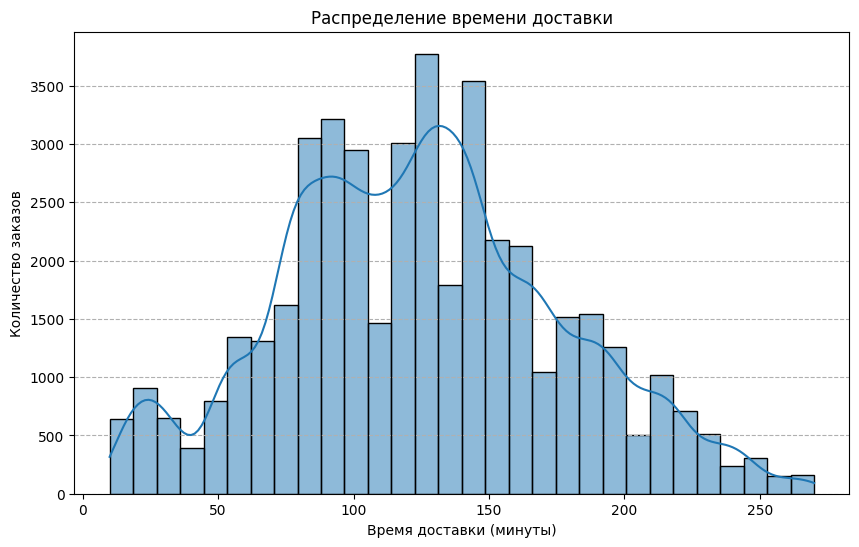

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Создаем гистограмму для Delivery_Time
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Delivery_Time', bins=30, kde=True)
plt.title('Распределение времени доставки')
plt.xlabel('Время доставки (минуты)')
plt.ylabel('Количество заказов')
plt.grid(axis='y', linestyle='--')
plt.show()

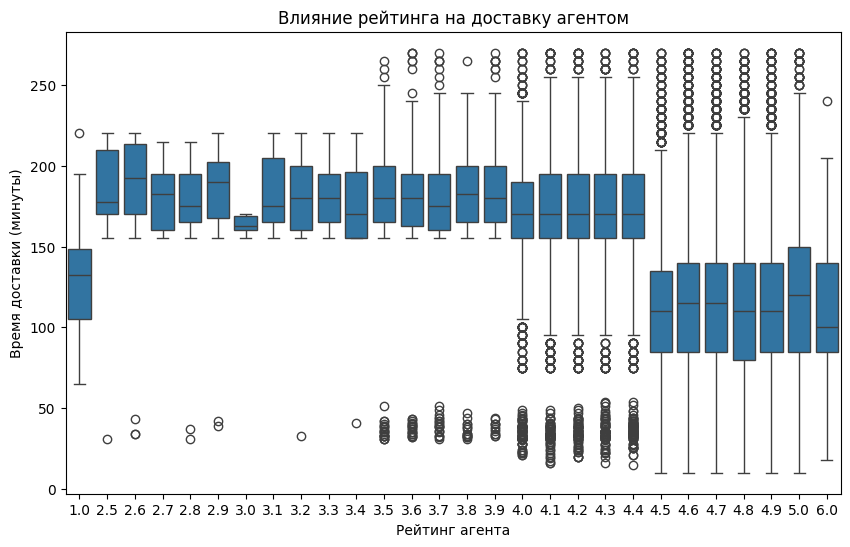

In [80]:
# Узнаем за сколько минут доставляет агент
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Agent_Rating', y='Delivery_Time')
plt.title('Влияние рейтинга на доставку агентом')
plt.xlabel('Рейтинг агента')
plt.ylabel('Время доставки (минуты)')
plt.show()

In [81]:
df['Agent_Rating'].unique()

array([4.9, 4.5, 4.4, 4.7, 4.6, 4.8, 4.2, 4.3, 4. , 4.1, 5. , 3.5, 3.8,
       nan, 3.9, 3.7, 2.6, 2.5, 3.6, 3.1, 2.7, 1. , 3.2, 3.3, 6. , 3.4,
       2.8, 2.9, 3. ])

In [82]:
df = df[df['Agent_Rating'] != 6.0]

In [83]:
df['Agent_Rating'].unique()

array([4.9, 4.5, 4.4, 4.7, 4.6, 4.8, 4.2, 4.3, 4. , 4.1, 5. , 3.5, 3.8,
       nan, 3.9, 3.7, 2.6, 2.5, 3.6, 3.1, 2.7, 1. , 3.2, 3.3, 3.4, 2.8,
       2.9, 3. ])

In [84]:
mean_rating = df['Agent_Rating'].mean()

df['Agent_Rating'].fillna(mean_rating, inplace=True)

C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_20928\146022609.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Agent_Rating'].fillna(mean_rating, inplace=True)


In [85]:
df['Agent_Rating'].unique()

array([4.9       , 4.5       , 4.4       , 4.7       , 4.6       ,
       4.8       , 4.2       , 4.3       , 4.        , 4.1       ,
       5.        , 3.5       , 3.8       , 4.63212092, 3.9       ,
       3.7       , 2.6       , 2.5       , 3.6       , 3.1       ,
       2.7       , 1.        , 3.2       , 3.3       , 3.4       ,
       2.8       , 2.9       , 3.        ])

In [86]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Weather_Encoded'] = le.fit_transform(df['Weather'])

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43686 entries, 0 to 43738
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order_ID         43686 non-null  object        
 1   Agent_Age        43686 non-null  int64         
 2   Agent_Rating     43686 non-null  float64       
 3   Store_Latitude   43686 non-null  float64       
 4   Store_Longitude  43686 non-null  float64       
 5   Drop_Latitude    43686 non-null  float64       
 6   Drop_Longitude   43686 non-null  float64       
 7   Order_Date       43686 non-null  datetime64[ns]
 8   Order_Time       43648 non-null  object        
 9   Pickup_Time      43686 non-null  object        
 10  Weather          43648 non-null  object        
 11  Traffic          43686 non-null  object        
 12  Vehicle          43686 non-null  object        
 13  Area             43686 non-null  object        
 14  Delivery_Time    43686 non-null  int64     

In [88]:
category_label = ['Traffic', 'Vehicle', 'Area', 'Category']

le = LabelEncoder()

for i in category_label:
    df[(i + '_encoded')] = le.fit_transform(df[i])

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43686 entries, 0 to 43738
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          43686 non-null  object        
 1   Agent_Age         43686 non-null  int64         
 2   Agent_Rating      43686 non-null  float64       
 3   Store_Latitude    43686 non-null  float64       
 4   Store_Longitude   43686 non-null  float64       
 5   Drop_Latitude     43686 non-null  float64       
 6   Drop_Longitude    43686 non-null  float64       
 7   Order_Date        43686 non-null  datetime64[ns]
 8   Order_Time        43648 non-null  object        
 9   Pickup_Time       43686 non-null  object        
 10  Weather           43648 non-null  object        
 11  Traffic           43686 non-null  object        
 12  Vehicle           43686 non-null  object        
 13  Area              43686 non-null  object        
 14  Delivery_Time     43686 non

In [90]:
mode_weather = df['Weather'].mode()[0]

df['Weather'].fillna(mode_weather, inplace=True)

C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_20928\2299701487.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weather'].fillna(mode_weather, inplace=True)


In [91]:
df.dropna(subset=['Order_Time'], inplace=True)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43648 entries, 0 to 43738
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          43648 non-null  object        
 1   Agent_Age         43648 non-null  int64         
 2   Agent_Rating      43648 non-null  float64       
 3   Store_Latitude    43648 non-null  float64       
 4   Store_Longitude   43648 non-null  float64       
 5   Drop_Latitude     43648 non-null  float64       
 6   Drop_Longitude    43648 non-null  float64       
 7   Order_Date        43648 non-null  datetime64[ns]
 8   Order_Time        43648 non-null  object        
 9   Pickup_Time       43648 non-null  object        
 10  Weather           43648 non-null  object        
 11  Traffic           43648 non-null  object        
 12  Vehicle           43648 non-null  object        
 13  Area              43648 non-null  object        
 14  Delivery_Time     43648 non

In [93]:
from sklearn.model_selection import train_test_split

# Определяем список признаков, которые пойдут в X
features = ['Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Store_Longitude',
            'Drop_Latitude', 'Drop_Longitude', 'Weather_Encoded', 'Traffic_encoded',
            'Vehicle_encoded', 'Area_encoded', 'Category_encoded']

X = df[features]

y = df['Delivery_Time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)

(34918, 11)


In [94]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [95]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)
print(f'Среднеквадратичная ошибка (MSE): {mse:.2f}')
print(f'Коэффициент детерминации (R-squared): {r2:.2f}')

Среднеквадратичная ошибка (MSE): 1887.81
Коэффициент детерминации (R-squared): 0.30
